<a href="https://colab.research.google.com/github/Samrat-Abdul-Jalil/Detection-of-Autism-Spectrum-Disorder-Using-Machine-Learning-/blob/main/code/Detection_of_Autism_Spectrum_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/BI/csv_result-Autism-Child-Data.csv')

In [26]:
pd.set_option('display.max_column', None)
data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [36]:
data['contry_of_res'].unique()

TypeError: ignored

In [28]:
data['ethnicity'].unique()

array(['Others', 'Middle Eastern ', '?', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [43]:
data['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='contry_of_res', ylabel='count'>

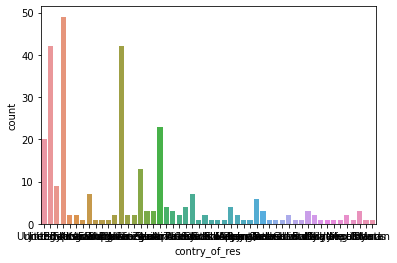

In [35]:
sns.countplot(data=data,x="contry_of_res")

<Axes: ylabel='A7_Score'>

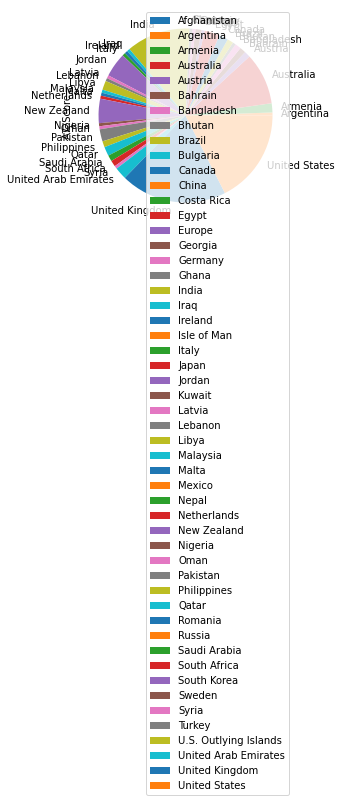

In [42]:
data.groupby(['contry_of_res']).sum().plot(kind='pie',y='A7_Score')

TypeError: ignored

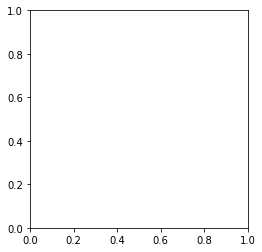

In [34]:
fig, ax=plt.subplots()
ax.pie(data['A8_Score'],data['contry_of_res'])